Набор содержит 25 000 изображений кошек и собак (по 12 500 для каждого класса) общим объемом 543 Мбайт (в сжатом виде). После загрузки и распаковки архива мы создадим новый набор, разделенный на три поднабора: обучающий набор с 1000 образцами каждого класса, проверочный набор с 500 образцами каждого класса и контрольный набор с 500 образцами каждого класса.

ПОДКЛЮЧЕНИЕ ВСЕХ НЕОБХОДИМЫХ МОДУЛЕЙ

In [ ]:
import os
import shutil
import numpy as np
import random
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
import matplotlib.pyplot as plt

ЗАГРУЗКА И КОПИРОВАНИЕ ВСЕХ ДАННЫХ (ФОТОГРАФИЙ)

In [ ]:
import os
import shutil

# путь к каталогу, в который данные были скачаны (папка train)
# из нее данные будут делиться на тренировочные, проверочные и тестовые
# папка test вообще НЕ УЧАСТВУЕТ здесь видимо
original_dataset_dir = '/content/drive/My Drive/Dogs_vs_Cats/train'
# путь к каталогу, в который будет отобран небольшой набор данных
base_dir = '/content/drive/My Drive/Dogs_vs_Cats/partial_data'

print('[INFO] This will take a while. Be patient!\n')

# папка для обучающего набора
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/train/
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
  print("[INFO] train_dir created!")
  os.mkdir(train_dir)

# папка для проверочного набора
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/validation/
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
  print("[INFO] validation_dir created!")
  os.mkdir(validation_dir)
# папка для контрольного набора
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/test/
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
  print("[INFO] test_dir created!")
  os.mkdir(test_dir)

# папка для обучающих изображений с кошками
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/train/cats
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
  print("[INFO] train_cats_dir created!")
  os.mkdir(train_cats_dir)

# папка для обучающих изображений с собаками
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/train/dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
  print("[INFO] train_dogs_dir created!")
  os.mkdir(train_dogs_dir)

# папка для проверочных изображений с кошками
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/validation/cats
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
  print("[INFO] validation_cats_dir created!")
  os.mkdir(validation_cats_dir)

# папка для проверочных изображений с собаками
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/validation/dogs
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
  print("[INFO] validation_dogs_dir created!")
  os.mkdir(validation_dogs_dir)

# папка для контрольных изображений с кошками
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/test/cats
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
  print("[INFO] test_cats_dir created!")
  os.mkdir(test_cats_dir)

# папка для контрольных изображений с собаками
# /content/drive/My Drive/Dogs_vs_Cats/partial_data/test/dogs
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
  print("[INFO] test_dogs_dir created!")
  os.mkdir(test_dogs_dir)

# копировать нужно, только если последняя директория пустая
if not os.listdir('/content/drive/My Drive/Dogs_vs_Cats/partial_data/test/dogs'):
  # добавление первых 1000 изображений с кошками в каталог train_cats_dir
  file_names = ['cat.{}.jpg'.format(i) for i in range(1000)]
  print("[INFO] copying to train_cats_dir")
  for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(train_cats_dir, file_name)
    shutil.copyfile(src, dst)

  # добавление следующий 500 изображений с кошками в каталог validation_cats_dir
  file_names = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
  print("[INFO] copying to validation_cats_dir")
  for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(validation_cats_dir, file_name)
    shutil.copyfile(src, dst)

  # добавление следующий 500 изображений с кошками в каталог test_cats_dir
  file_names = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
  print("[INFO] copying to test_cats_dir")
  for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(test_cats_dir, file_name)
    shutil.copyfile(src, dst)

  # добавление первых 1000 изображений с собаками в каталог train_dogs_dir
  file_names = ['dog.{}.jpg'.format(i) for i in range(1000)]
  print("[INFO] copying to train_dogs_dir")
  for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(train_dogs_dir, file_name)
    shutil.copyfile(src, dst)

  # добавление следующий 500 изображений с собаками в каталог validation_dogs_dir
  file_names = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
  print("[INFO] copying to validation_dogs_dir")
  for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(validation_dogs_dir, file_name)
    shutil.copyfile(src, dst)

  # добавление следующий 500 изображений с собаками в каталог test_dogs_dir
  file_names = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
  print("[INFO] copying to test_dogs_dir")
  for file_name in file_names:
    src = os.path.join(original_dataset_dir, file_name)
    dst = os.path.join(test_dogs_dir, file_name)
    shutil.copyfile(src, dst)
else:
  print("[INFO] All files have already been copied!")

# подсчитаем все фото
print(f'Total training cats images: {len(os.listdir(train_cats_dir))}')
print(f'Total training dogs images: {len(os.listdir(train_dogs_dir))}')
print(f'Total validation cats images: {len(os.listdir(validation_cats_dir))}')
print(f'Total validation dogs images: {len(os.listdir(validation_dogs_dir))}')
print(f'Total test cats images: {len(os.listdir(test_cats_dir))}')
print(f'Total test dogs images: {len(os.listdir(test_dogs_dir))}')


[INFO] This will take a while. Be patient!

[INFO] All files have already been copied!
Total training cats images: 1000
Total training dogs images: 1000
Total validation cats images: 500
Total validation dogs images: 500
Total test cats images: 500
Total test dogs images: 500


СОЗДАНИЕ МОДЕЛИ

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

НАСТРОЙКА ОПТИМИЗАТОРА

In [ ]:
# указываем скорость обучение вручную
custom_optimizer = optimizers.RMSprop(lr=1e-4) 

КОМПИЛЯЦИЯ МОДЕЛИ

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

СОЗДАНИЕ СУПЕР-ГЕНЕРАТОРА, КОТОРЫЙ БУДЕТ ИЗМЕНЯТЬ ИЗОБРАЖЕНИЯ ДЛЯ АУГМЕНТАЦИИ

In [ ]:
# суть аугментации в том, чтобы рандомными способами изменять входные изображения так, чтобы
# модель никогда не видела одно и то же изображение дважды
# для этого в генераторе надо сделать несколько настроек
datagen = ImageDataGenerator(
    rotation_range=40, # поворот на угол
    width_shift_range=0.2, # растягивание в ширину
    height_shift_range=0.2, # растягивание в высоту
    shear_range=0.2, # сдвиг в сторону
    zoom_range=0.2, # увеличение масштаба
    horizontal_flip=True, # поворот половины изображения вокруг горизонтальной оси
    fill_mode='nearest', # способ заполнения новых пикселей (которые получились после преобразований)
    rescale=1./255 # каждый пиксель принимает значение от 0 до 1 (а было от 0 до 255)
)

СОЗДАНИЕ ГЕНЕРАТОРОВ ДЛЯ БЫСТРОГО ПРЕОБРАЗОВАНИЯ ИЗОБРАЖЕНИЙ В ТЕНЗОРЫ

In [ ]:
train_datagen = datagen # только тренировочный генератор должен менять фото
test_datagen = ImageDataGenerator(rescale=1./255) # тестовые не меняются
validation_generator = ImageDataGenerator(rescale=1./255) # проверочные тоже
# происходит "подкачка" изображений из целевого каталога
# все изображения приводятся к размеру 150:150
# так как функия потерь бинарная, то метки тоже должны быть бинарными
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = validation_generator.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')

# каждый генератор БЕСКОНЕЧНО возвращает пакеты данных (20, 150, 150, 3) и меток (20, )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


ОТОБРАЖЕНИЕ НЕКОТОРЫХ ИЗОБРАЖЕНИЙ, ПОДВЕРГШИХСЯ АУГМЕНТАЦИИ

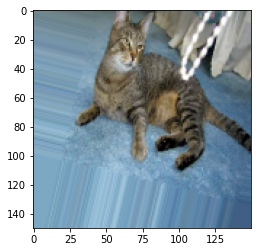

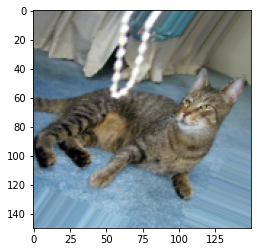

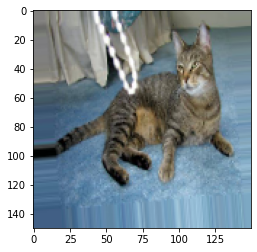

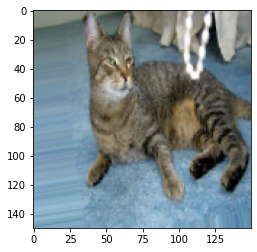

In [ ]:
file_names = [os.path.join(train_cats_dir, file_name) for file_name in os.listdir(train_cats_dir)]
# выбираем любое изображение для обработки
img_path = file_names[random.randint(0, 1000)]
img = image.load_img(img_path, target_size=(150,150))
# преобразование в массив numpy формы (1, 150, 150, 3)
x = image.img_to_array(img)
x = x.reshape((1, 150, 150, 3))
i = 0
# бесконечный цикл генерации изображений
for batch in datagen.flow(x, batch_size=1):
  # создания отдельного окна под изображение
  plt.figure(i)
  # в обратную сторону: предобработанный в генераторе массив преобразуем в картинку
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  # цикл выполняется бесконечно, а это - условие остановки (всего будет 4 изображения)
  if i % 4 == 0:
    break
plt.show()

ОБУЧЕНИЕ МОДЕЛИ С ПОМОЩЬЮ ГЕНЕРАТОРА

In [ ]:
# первый аргумент - сам бесконечный генератор
# второй аргумент - количество образцов, которое нужно достать из генератора, 
# чтобы считать эпоху завершенной (ведь он работает бесконечно, и модель не
#                                  может сама понять, когда перейти к следующей 
#                                  эпохе)
# для валидации тоже можно указать генератор, но тогда нужно указывать и количес-
# тво пакетов, которые из него будут извлекаться
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
history = history.history

СОХРАНЕНИЕ МОДЕЛИ

In [ ]:
model.save('/content/drive/My Drive/Dogs_vs_Cats/weights/cats_vs_dogs_small_1.h5')

СОЗДАДИМ ГРАФИКИ ОБУЧЕНИЯ МОДЕЛИ

In [ ]:
def draw_graph(history):
  acc = history['accuracy']
  val_acc = history['val_accuracy']
  loss = history['loss']
  val_loss = history['val_loss']

  epochs = range(1, len(acc)+1)
  plt.plot(epochs, acc, 'b', label='training_acc')
  plt.plot(epochs, loss, 'r', label='training_loss')
  plt.legend()
  plt.figure()
  plt.show()

  plt.clf()


УДАЛЕНИЕ НЕНУЖНЫХ ДАННЫХ ДЛЯ ОСВОБОЖДЕНИЯ МЕСТА В ОПЕРАТИВНОЙ ПАМЯТИ ВИДЕОКАРТЫ


In [ ]:
del model
del train_generator
del test_generator
del validation_generator

ЗАГРУЗКА РАНЕЕ НАТРЕНИРОВАННОЙ МОДЕЛИ

In [ ]:
model = load_model('/content/drive/My Drive/Dogs_vs_Cats/weights/cats_vs_dogs_small_1.h5')

ИСПОЛЬЗУЕМ ПЕРЕНОС ОБУЧЕНИЯ ДЛЯ МОДЕЛИ VGG16

In [ ]:
# vgg16 была натренирована на 1.4 миллионах изображений многих классов, поэтому
# она умеет отлично изввлекать обобщенные признаки (прямая, круг и т.д.) и более
# конкретные (глаз кошки, нос собаки и т.д.)
# мы используем первые слои (сверточную основу), заморозив и перенеся ее в 
# наше модель, созданную вручную
# include_top = False значит "не включать полносвязные слои"
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

# РАССМОТРИМ ПЕРВЫЙ ВАРИАНТ РАЗВИТИЯ СОБЫТИЙ:



*   ПРОПУСТИМ ТРЕНИРОВОЧНЫЕ ДАННЫЕ ЧЕРЕЗ СВЕРТОЧНУЮ ОСНОВУ VGG16
*   ИЗВЛЕЧЕМ ПРИЗНАКИ И МЕТКИ ИЗ ПОЛУЧЕННЫХ В РЕЗУЛЬТАТЕ ЭТОГО ДАННЫХ
*   ЭТИ ПРИЗНАКИ И МЕТКИ ПОМЕСТИМ В ОТДЕЛЬНЫЙ КЛАССИФИКАТОР

ЭТОТ СПОСОБ НЕ ПОДДЕРЖИВАЕТ АУГМЕНТАЦИЮ

ВИДИМО, В КНИГЕ ЕСТЬ КАКАЯ-ТО ОПЕЧАТКА, ПРОБЛЕМА В СЛЕДУЮЩЕМ:

1) В ЯЧЕЙКЕ НИЖЕ В СТРОКЕ features_batch = conv_base.predict(inputs_batch) ВЫДАЮТСЯ ПРЕДСКАЗАНИЯ НЕ ФОРМЫ (4, 4, 512) КАК В КНИГЕ ПРЕДПОЛАГАЕТСЯ, А (BATCH_SIZE, 4, 4, 512) И ВОТ 
УЖЕ ИХ ПОМЕЩАЕМ В МАССИВ FEATURES (2000, BATCH_SIZE, 4, 4, 512)

2) ФУНКЦИЯ АКТИВАЦИИ SIGMOID (КРАЙНЕ НЕОБХОДИМАЯ НАМ) НЕ МОЖЕТ ВОСПРИНЯТЬ ТАКУЮ ФОРМУ - РУГАЕТСЯ НА ТО, ЧТО У ПРИЗНАКОВ ФОРМА (20, 20) А У МЕТОК (20, 1)

3) ПРИ ПОДСТАНОВКЕ ДРУГОЙ ФУНКЦИИ АКТИВАЦИИ LOSS ПРОСТО НЕ ПАДАЕТ

Я ПЕРЕПРОБОВАЛ ВСЕ - СДАЮСЬ!

ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

In [ ]:
# выделение признаков с помощью предварительно обученной основы
batch_size = 20
local_datagen = ImageDataGenerator(rescale=1./255)
def extract_features(dir, sample_count):
  # четырехмерный тензор признаков
  features = np.zeros(shape=(sample_count, batch_size, 4, 4, 512))# 4 4 512 - размер тензора на выходе основы
  # одномерный тензор меток
  labels = np.zeros(shape=(sample_count, batch_size))
  generator = local_datagen.flow_from_directory(dir, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
  i = 0
  # в генераторе находятся два набора: тренировочные данные и ответы (верные метки)
  for inputs_batch, labels_batch in generator:
    # основа используется для предсказаний
    # возвращается тензор формы (batch_size, 4, 4, 512)
    features_batch = conv_base.predict(inputs_batch)
    print(f'inputs_batch shape is {inputs_batch.shape}')
    print(f'features_batch shape is {features_batch.shape}')
    print(f'labels_batch shape is {labels_batch.shape}')
    # заполняем массивы
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size > sample_count:
      break
  return features, labels


ИЗВЛЕЧЕНИЕ И СОХРАНЕНИЕ ДАННЫХ В ФАЙЛЫ (ИНАЧЕ ЗАБИВАЕТСЯ ОПЕРАТИВКА)

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
np.save('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/train_features.npy', train_features)
np.save('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/train_labels.npy', train_labels)
del train_features
del train_labels

In [ ]:
validation_features, validation_labels = extract_features(validation_dir, 1000)
np.save('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/validation_features.npy', validation_features)
np.save('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/validation_labels.npy', validation_labels)
del validation_features
del validation_labels

Found 1000 images belonging to 2 classes.


In [ ]:
test_features, test_labels = extract_features(test_dir, 1000)
np.save('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/test_features.npy', test_features)
np.save('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/test_labels.npy', test_labels)
del test_features
del test_labels

Found 1000 images belonging to 2 classes.


СЕЙЧАС ПРИЗНАКИ ИМЕЮТ ФОРМУ (КОЛИЧЕСТВО, batch_size, 4, 4, 512) НО МЫ ИХ БУДЕМ ПЕРЕДАВАТЬ В ПОЛНОСВЯЗНЫЙ СЛОЙ, ТАК ЧТО НАДО ПОМЕНЯТЬ ФОРМУ НА ДВУМЕРНУЮ


In [ ]:
train_features = np.load('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/train_features.npy')
train_labels = np.load('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/train_labels.npy')
train_features = np.reshape(train_features, (2000, batch_size * 4 * 4 * 512))

In [ ]:
validation_features = np.load('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/validation_features.npy')
validation_labels = np.load('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/validation_labels.npy')
validation_features = np.reshape(validation_features, (1000, batch_size * 4 * 4 * 512))

In [ ]:
test_features = np.load('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/test_features.npy')
test_labels = np.load('/content/drive/My Drive/Dogs_vs_Cats/numpy_data/test_labels.npy')
test_features = np.reshape(test_features, (1000, batch_size * 4 * 4 * 512))

In [ ]:
train_features.shape

(2000, 163840)

In [ ]:
train_labels.shape

(2000, 20)

СОЗДАНИЕ МОДЕЛИ НОВОГО ПОЛНОСВЯЩНОГО КЛАССИФИКАТОРА

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = batch_size * 4 * 4 * 512))
model.add(Dropout(0.5))
# sigmoid - для вероятности от 0 до 1
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

ТРЕНИРОВКА МОДЕЛИ

In [ ]:
#history = model.fit(train_features, train_labels, batch_size=20, epochs=30, validation_data=(validation_features, validation_labels))
history = model.fit(train_features, train_labels, batch_size=batch_size, epochs=30, validation_split=0.2)
history = history.history

СОХРАНЕНИЕ ВЕСОВ

In [ ]:
model.save('/content/drive/My Drive/Dogs_vs_Cats/weights/cats_vs_dogs_small_2.h5')

СОЗДАДИМ ГРАФИК ОБУЧЕНИЯ МОДЕЛИ

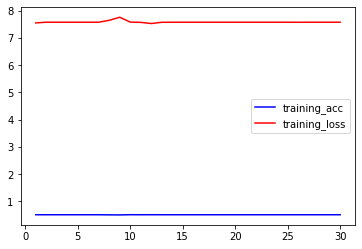

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
draw_graph(history)

# РАССМОТРИМ ВТОРОЙ ВАРИАНТ РАЗВИТИЯ СОБЫТИЙ:
ДОПОЛНИМ СВЕРТОЧНУЮ ОСНОВУ СЛОЯМИ DENSE 

ЭТОТ СПОСОБ ПОДДЕРЖИВАЕТ АУГМЕНТАЦИЮ



In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


ЗАМОРАЖИВАНИЕ СВЕРТОЧНОЙ ОСНОВЫ

In [ ]:
# сейчас основа работает так, как требуется
# но если мы начнем тренировать ее на наших данных, то веса ее начнут меняться и
# вся суть ее использования потеряется
# так что ее необходимо "заморозить" - то есть сделать так, чтобы ее слои не 
# меняли веса в себе
print(f"This is the number of trainable weights before freezing: {len(model.trainable_weights)}")
conv_base.trainable = False
print(f"This is the number of trainable weights after freezing: {len(model.trainable_weights)}")
# компиляция модели для того, чтобы изменения вступили в силу
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

This is the number of trainable weights before freezing: 30
This is the number of trainable weights after freezing: 4


СОЗДАНИЕ ГЕНЕРАТОРОВ ДЛЯ ОБУЧЕНИЯ

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=40, width_shift_range=0.2,
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


ОБУЧЕНИЕ МОДЕЛИ С ЗАМОРОЖЕННОЙ ЧАСТЬЮ

In [ ]:
history = model.fit(
    train_generator,
    epochs=30, 
    steps_per_epoch=100, 
    validation_data=validation_generator,
    validation_steps=50
)

СОХРАНЕНИЕ ВЕСОВ

In [ ]:
model.save('/content/drive/My Drive/Dogs_vs_Cats/weights/cats_vs_dogs_small_3.h5')

СОЗДАДИМ ГРАФИК ОБУЧЕНИЯ МОДЕЛИ

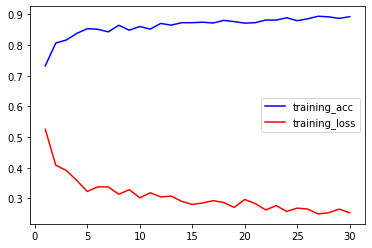

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
draw_graph(history)

ЗАЙМЕМСЯ ДООБУЧЕНИЕМ


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

ЗАМОРАЖИВАНИЕ ВСЕХ СЛОЕВ ОСНОВЫ, КРОМЕ ЗАДАННЫХ

In [ ]:
conv_base.trainalbe = True

set_traindable = False
for layer in conv_base.layers:
  # только дойдя до этого слоя set_trainable станет True
  if layer.name == 'block5_conv1':
    set_traindable = True
  if set_traindable:
    layer.trainable = True
  else:
    layer.trainable = False


КОМПИЛИРУЕМ МОДЕЛЬ С ОЧЕНЬ МАЛЕНЬКОЙ СКОРОСТЬЮ ТРЕНИРОВКИ

In [ ]:
# малая скорость тренировки нужна для того, чтобы не внести слишком сильные 
# изменения в эти последние слои и не разрушить всю архитектуру
model.compile(
    loss='binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-5),
    metrics=['accuracy']
)

НАЧИНАЕМ ДООБУЧЕНИЕ

In [ ]:
history = model.fit(
    train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)
history = history.history

Epoch 1/100
100/100 [==============================] - 2036s 20s/step - loss: 0.6378 - accuracy: 0.6500 - val_loss: 0.5355 - val_accuracy: 0.7910
Epoch 2/100
100/100 [==============================] - 16s 157ms/step - loss: 0.5538 - accuracy: 0.7475
Epoch 3/100
100/100 [==============================] - 16s 156ms/step - loss: 0.4896 - accuracy: 0.7815
Epoch 4/100
100/100 [==============================] - 16s 158ms/step - loss: 0.4539 - accuracy: 0.8030
Epoch 5/100
100/100 [==============================] - 16s 157ms/step - loss: 0.4309 - accuracy: 0.8155
Epoch 6/100
100/100 [==============================] - 16s 157ms/step - loss: 0.4128 - accuracy: 0.8115
Epoch 7/100
100/100 [==============================] - 16s 157ms/step - loss: 0.3929 - accuracy: 0.8330
Epoch 8/100
100/100 [==============================] - 16s 161ms/step - loss: 0.3813 - accuracy: 0.8355
Epoch 9/100
100/100 [==============================] - 16s 157ms/step - loss: 0.3828 - accuracy: 0.8265
Epoch 10/100
100/100 [

СОЗДАНИЕ ГРАФИКА ПО РЕЗУЛЬТАТАМ ТРЕНИРОВКИ

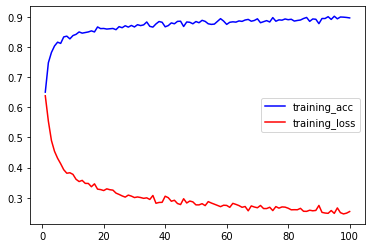

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:

def draw_graph(history):
  acc = history['accuracy']
  val_acc = history['val_accuracy']
  loss = history['loss']
  val_loss = history['val_loss']

  epochs = range(1, len(acc)+1)
  plt.plot(epochs, acc, 'b', label='training_acc')
  plt.plot(epochs, loss, 'r', label='training_loss')
  plt.legend()
  plt.figure()
  plt.show()

  plt.clf()

draw_graph(history)

СОХРАНЕНИЕ ВЕСОВ

In [ ]:
model.save('/content/drive/My Drive/Dogs_vs_Cats/weights/cats_vs_dogs_small_4.h5')

СГЛАЖИВАНИЕ ГРАФИКОВ

In [ ]:
# так как полученные выше графики искажены помехами (острые вершины на всем
#                                                    протяжении графика)
# необходимо сгладить их и заменить реальные значения ЭКСПОНЕНЦИАЛЬНО СКОЛЬЗЯЩИМ СРЕДНИМ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

ФУНКЦИЯ РИСУЕТ СГЛАЖЕННЫЙ ГРАФИК

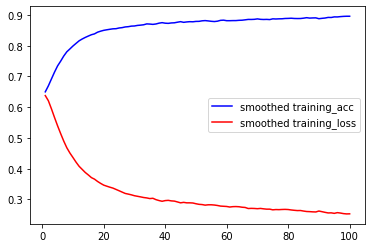

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
def draw_smooth_graph(history):
  acc = history['accuracy']
  val_acc = history['val_accuracy']
  loss = history['loss']
  val_loss = history['val_loss']

  epochs = range(1, len(acc)+1)
  plt.plot(epochs, smooth_curve(acc), 'b', label='smoothed training_acc')
  plt.plot(epochs, smooth_curve(loss), 'r', label='smoothed training_loss')
  plt.legend()
  plt.figure()
  plt.show()

  plt.clf()

draw_smooth_graph(history)